In [28]:
import numpy as np
import matplotlib.pyplot as plt 
from pprint import pprint
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [29]:
iris =  datasets.load_iris() 
x = iris.data 
y = iris.target
print(x[:5])
print(y[:20])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
#print(x[:,0])
#print(x[:,1])
#print(x[:,2])
print(x[:,3])

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.  2.3 1.8]


In [31]:
#plt.scatter(x[:,0],x[:,1],marker='*', c=y)
#plt.show()

In [32]:
#plt.scatter(x[:,2],x[:,3],marker='*', c=y) 
#plt.show()

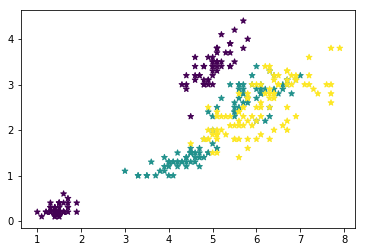

In [33]:
plt.scatter(x[:,0],x[:,1],marker='*', c=y)
plt.scatter(x[:,2],x[:,3],marker='*', c=y) 
plt.show()

In [34]:
def get_random_centroids(k):
    centroids={}
    while True:
        ri=np.random.choice(range(len(x)), k)
        print(ri)
        if len(set(ri))==k:  #found distinct k indexes.
            for i in range(k):
                centroids[i]=x[ri[i]]
            break

    return centroids

In [35]:
k = 3
centroids=get_random_centroids(k)
#print(centroids.keys())
print(centroids)

[ 64 118 113]
{0: array([5.6, 2.9, 3.6, 1.3]), 1: array([7.7, 2.6, 6.9, 2.3]), 2: array([5.7, 2.5, 5. , 2. ])}


In [36]:
def e_dist(x1, x2):
    return np.sqrt( (x1[0]-x2[0])**2 +  (x1[1]-x2[1])**2)

def e_dist(x1, x2):
    return np.linalg.norm(x1-x2)

In [37]:
e_dist(np.array([0,0]), np.array([3,4]))

5.0

In [38]:
print(centroids.items())

dict_items([(0, array([5.6, 2.9, 3.6, 1.3])), (1, array([7.7, 2.6, 6.9, 2.3])), (2, array([5.7, 2.5, 5. , 2. ]))])


In [39]:
xx=[8,9,5,3]
dd=[e_dist(xx,v) for k,v in centroids.items() ]
print(dd)

closest=dd.index( min(dd) )
print(closest)

[6.915200647848188, 6.719374970932938, 6.967065379340142]
1


In [40]:
for xx in x:                                        #for each sample
    dists=[e_dist(xx,v) for k,v in centroids.items() ]
    closest=dists.index( min(dists) )
    mc=list(centroids.values())[closest]
    print('xx =',xx,' closest centroid =',mc)
    

xx = [5.1 3.5 1.4 0.2]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [4.9 3.  1.4 0.2]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [4.7 3.2 1.3 0.2]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [4.6 3.1 1.5 0.2]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [5.  3.6 1.4 0.2]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [5.4 3.9 1.7 0.4]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [4.6 3.4 1.4 0.3]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [5.  3.4 1.5 0.2]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [4.4 2.9 1.4 0.2]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [4.9 3.1 1.5 0.1]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [5.4 3.7 1.5 0.2]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [4.8 3.4 1.6 0.2]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [4.8 3.  1.4 0.1]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [4.3 3.  1.1 0.1]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [5.8 4.  1.2 0.2]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [5.7 4.4 1.5 0.4]  closest centroid = [5.6 2.9 3.6 1.3]
xx = [5.4 3.9 1.3 0.4]  

In [41]:
print(centroids)

{0: array([5.6, 2.9, 3.6, 1.3]), 1: array([7.7, 2.6, 6.9, 2.3]), 2: array([5.7, 2.5, 5. , 2. ])}


# Finding Good K using elbow method

In [55]:
nitr=200
sses={}
for k in range(1,13):                                                       #trying for different k value.
    
    centroids=get_random_centroids(k)
    old_centroids={}
    
    for i in range(nitr):
        clusters={}
        for ik,iv in centroids.items():
            clusters[ik]=[]

        print('centroids: ',centroids)
        
        for xx in x:
            dists=[e_dist(xx,v) for k,v in centroids.items() ] #k distance from k centroid.
            closest=dists.index( min(dists) )
            clusters[closest].append(xx)

            
        for ik in range(k):
            old_centroids[ik]=centroids[ik].copy()
            
            
        #update centroids.
        nc={}
        for ik in range(k):
            avg_c=np.array(clusters[ik]).mean(axis=0)
            nc[ik]=avg_c  #average.
            centroids[ik]=avg_c
            
            

        #checking centroids update.
        nupdate=0
        for ik in range(k):
            if e_dist( centroids[ik], old_centroids[ik] ) > 0:
                nupdate+=1
        if nupdate==0:
            print('NO FURTHER UPDATE')
            break
            
            
    sse=0               # Sum of Squared Error
    for cluster,centroid in zip(clusters.values() ,centroids.values()):
        for xx in cluster:
            d=e_dist(xx, centroid)
            sse+=d*d
    print('k=',k, 'sse=',sse)
    sses[k]=sse
    
    

[86]
centroids:  {0: array([6.7, 3.1, 4.7, 1.5])}
centroids:  {0: array([5.84333333, 3.05733333, 3.758     , 1.19933333])}
NO FURTHER UPDATE
k= 1 sse= 681.3706000000001
[148   5]
centroids:  {0: array([6.2, 3.4, 5.4, 2.3]), 1: array([5.4, 3.9, 1.7, 0.4])}
centroids:  {0: array([6.32105263, 2.89894737, 4.98947368, 1.71052632]), 1: array([5.01818182, 3.33090909, 1.63090909, 0.31636364])}
centroids:  {0: array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), 1: array([5.00566038, 3.36981132, 1.56037736, 0.29056604])}
NO FURTHER UPDATE
k= 2 sse= 152.34795176035794
[22 92 65]
centroids:  {0: array([4.6, 3.6, 1. , 0.2]), 1: array([5.8, 2.6, 4. , 1.2]), 2: array([6.7, 3.1, 4.4, 1.4])}
centroids:  {0: array([5.006, 3.428, 1.462, 0.246]), 1: array([5.61944444, 2.61388889, 4.15      , 1.33333333]), 2: array([6.6234375, 3.0171875, 5.33125  , 1.86875  ])}
centroids:  {0: array([5.006, 3.428, 1.462, 0.246]), 1: array([5.69  , 2.665 , 4.1575, 1.31  ]), 2: array([6.64333333, 3.01      , 5.405     ,

centroids:  {0: array([4.8625, 3.425 , 1.35  , 0.2125]), 1: array([5.58      , 2.63333333, 3.98666667, 1.23333333]), 2: array([7.24117647, 3.16470588, 6.15294118, 2.13529412]), 3: array([6.66363636, 3.00909091, 4.62727273, 1.44545455]), 4: array([5.17777778, 3.55      , 1.52777778, 0.29444444]), 5: array([5.52857143, 4.04285714, 1.47142857, 0.28571429]), 6: array([6.24761905, 2.88809524, 5.13095238, 1.86666667]), 7: array([4.67647059, 3.04705882, 1.44117647, 0.19411765])}
centroids:  {0: array([4.87, 3.44, 1.41, 0.21]), 1: array([5.53214286, 2.63571429, 3.96071429, 1.22857143]), 2: array([7.21111111, 3.16111111, 6.12222222, 2.15      ]), 3: array([6.43 , 2.94 , 4.59 , 1.435]), 4: array([5.18823529, 3.54705882, 1.53529412, 0.3       ]), 5: array([5.52857143, 4.04285714, 1.47142857, 0.28571429]), 6: array([6.26176471, 2.87352941, 5.22647059, 1.93529412]), 7: array([4.66875, 3.025  , 1.4125 , 0.19375])}
centroids:  {0: array([4.87, 3.44, 1.41, 0.21]), 1: array([5.53214286, 2.63571429, 3.9

centroids:  {0: array([5.08      , 3.52666667, 1.43333333, 0.22666667]), 1: array([5.   , 2.3  , 3.275, 1.025]), 2: array([5.57647059, 2.59411765, 3.98235294, 1.21764706]), 3: array([6.16666667, 2.3       , 4.8       , 1.5       ]), 4: array([5.1   , 3.4   , 1.6875, 0.3625]), 5: array([6.47692308, 2.92307692, 4.45384615, 1.39230769]), 6: array([6.0375 , 2.90625, 4.925  , 1.8    ]), 7: array([4.65      , 3.1       , 1.38888889, 0.2       ]), 8: array([6.83421053, 3.05789474, 5.74473684, 2.08157895]), 9: array([5.51111111, 3.94444444, 1.45555556, 0.26666667]), 10: array([5.82222222, 2.92222222, 4.48888889, 1.36666667])}
centroids:  {0: array([5.09375, 3.5375 , 1.45   , 0.225  ]), 1: array([5.   , 2.3  , 3.275, 1.025]), 2: array([5.60555556, 2.60555556, 3.98333333, 1.22222222]), 3: array([6.2 , 2.3 , 4.7 , 1.45]), 4: array([5.11428571, 3.45714286, 1.7       , 0.38571429]), 5: array([6.6       , 3.02307692, 4.60769231, 1.44615385]), 6: array([6.06666667, 2.81666667, 5.05      , 1.85      ]

In [56]:
sses

{1: 681.3706000000001,
 2: 152.34795176035794,
 3: 78.85566582597723,
 4: 57.22847321428573,
 5: 49.862249999999996,
 6: 39.306107125307115,
 7: 38.705236441494044,
 8: 36.228589402427644,
 9: 35.63193217223391,
 10: 33.78729184704186,
 11: 31.733652279737807,
 12: 32.8402380952381}

In [57]:
ks=[i+1 for i in range(len(sses.values()))]
print(ks)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


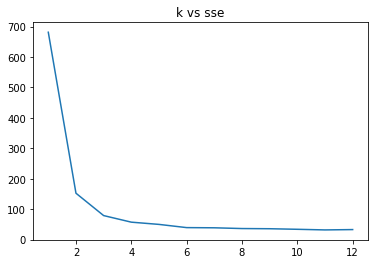

In [58]:
plt.plot(ks, sses.values())
plt.title('k vs sse')
plt.show()